In [1]:
import keras
from keras.datasets import imdb
from keras import models, layers, optimizers, losses, metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
assert max([max(seq) for seq in train_data]) == 9999

In [4]:
def decodeReview(sample_index):
  word_index = imdb.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  # reserved::= 0-padding, 1-start of seq, 2-unknown
  decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[sample_index]])
  return decoded_review

In [5]:
print(decodeReview(10)) # sanity check

? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black magi

In [6]:
def vectorizeSequences(sequences, dim=10000):
  vec_seq = np.zeros((len(sequences), dim))
  for i,seq in enumerate(sequences):
    vec_seq[i][seq] = 1.
  return vec_seq

In [7]:
x_train = vectorizeSequences(train_data)
x_test = vectorizeSequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [16]:
split = 10000
x_val = x_train[:split]
partial_x_train = x_train[split:]
y_val = y_train[:split]
partial_y_train = y_train[split:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 1s 44ms/step - loss: 0.6885 - binary_accuracy: 0.5059 - val_loss: 0.6780 - val_binary_accuracy: 0.5313
Epoch 2/50
30/30 [==============================] - 1s 32ms/step - loss: 0.6668 - binary_accuracy: 0.5277 - val_loss: 0.6546 - val_binary_accuracy: 0.5513
Epoch 3/50
30/30 [==============================] - 1s 33ms/step - loss: 0.6407 - binary_accuracy: 0.5986 - val_loss: 0.6298 - val_binary_accuracy: 0.6574
Epoch 4/50
30/30 [==============================] - 1s 33ms/step - loss: 0.6128 - binary_accuracy: 0.6943 - val_loss: 0.6057 - val_binary_accuracy: 0.7219
Epoch 5/50
30/30 [==============================] - 1s 33ms/step - loss: 0.5864 - binary_accuracy: 0.7498 - val_loss: 0.5827 - val_binary_accuracy: 0.7579
Epoch 6/50
30/30 [==============================] - 1s 33ms/step - loss: 0.5613 - binary_accuracy: 0.7920 - val_loss: 0.5608 - val_binary_accuracy: 0.7937
Epoch 7/50
30/30 [==============================] - 1s 32ms/step - los

In [18]:
hist = history.history
print(hist.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


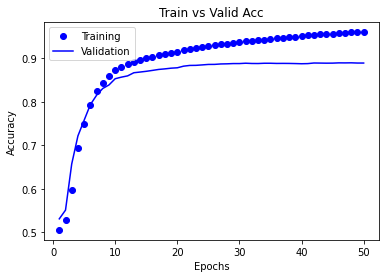

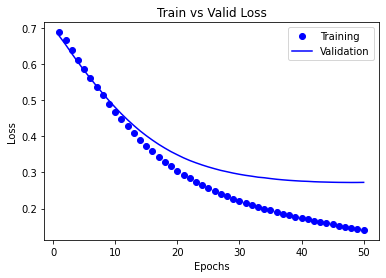

In [21]:
def plotMetric(metric1, metric2, title, label1, label2, xlabel, ylabel ):
  assert len(metric1) == len(metric2)
  num_points = range(1, len(metric1)+1)
  plt.plot(num_points, metric1, 'bo', label=label1)
  plt.plot(num_points, metric2, 'b', label=label2)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

acc = hist['binary_accuracy']
val_acc = hist['val_binary_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']
plotMetric(acc, val_acc, 'Train vs Valid Acc', 'Training', 'Validation', 'Epochs', 'Accuracy')
plotMetric(loss, val_loss, 'Train vs Valid Loss', 'Training', 'Validation', 'Epochs', 'Loss')